# Grid lines defined by EMC3-EIRENE

Here we plot the grid lines defined by EMC3-EIRENE.

In [1]:
from matplotlib import pyplot as plt

from cherab.lhd.emc3 import Grid

plt.rcParams["figure.dpi"] = 120

## Grid lines for one zone

Let us first instantiate the `Grid` class, where we automatically load the grid data.

In [ ]:
grid = Grid("zone0")
grid  # noqa

Grid(zone='zone0', dataset='/Users/koyo/Library/Caches/cherab/lhd/emc3/grid-360.nc')

Then we plot the grid lines in the poloidal plane.


(<Figure size 768x576 with 1 Axes>, <Axes: xlabel='$R$ [m]', ylabel='$Z$ [m]'>)

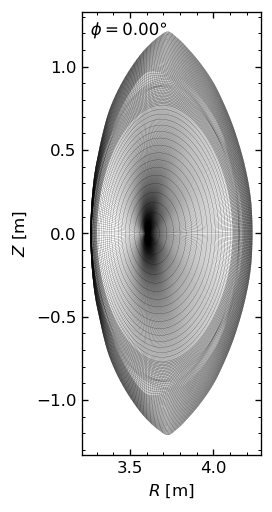

In [3]:
grid.plot(linewidth=0.1)

Let us plot the grid lines at several toroidal angles.


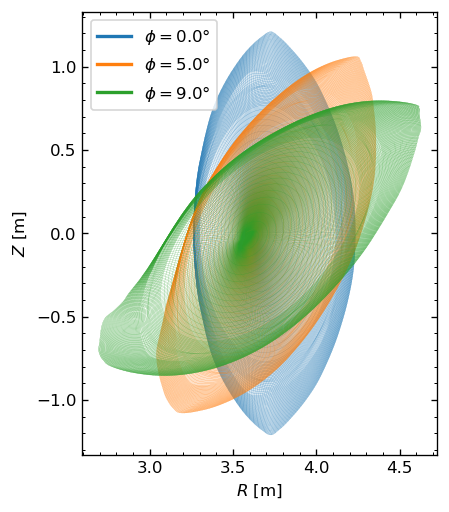

In [4]:
fig, ax = plt.subplots()
n_phis = [0, 20, -1]
for i, n_phi in enumerate(n_phis):
    fig, ax = grid.plot(
        fig=fig,
        ax=ax,
        n_phi=n_phi,
        linewidth=0.1,
        color=f"C{i}",
        show_phi=False,
    )

# Add a legend
phis = grid.data_array["ζ"]
proxy = [plt.Line2D([0], [0], color=f"C{i}", lw=2) for i in range(len(n_phis))]
ax.legend(proxy, [f"$\\phi=${phi}°" for phi in phis.isel(ζ=n_phis).data]);

You can also plot the grid outlines in the poloidal plane.

(<Figure size 768x576 with 1 Axes>, <Axes: xlabel='$R$ [m]', ylabel='$Z$ [m]'>)

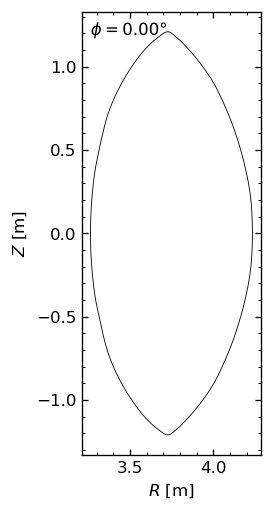

In [5]:
grid.plot_outline()

## Grid lines for several zones

EMC3-EIRENE-defined grid for LHD is divided into several zones.
We can plot the grid lines with different colors for each zone.

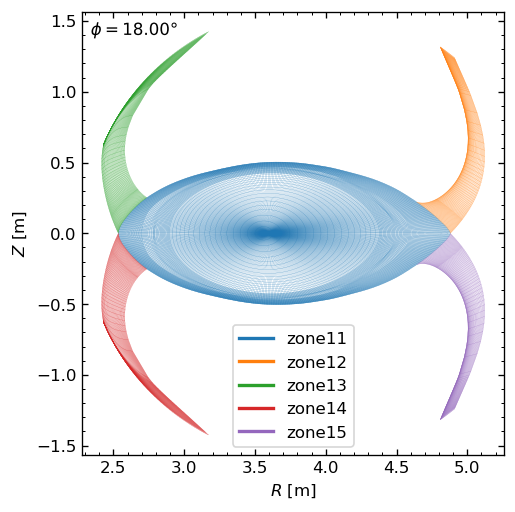

In [6]:
zones = ["zone11", "zone12", "zone13", "zone14", "zone15"]

fig, ax = plt.subplots()
show_phi = True
for i, zone in enumerate(zones):
    Grid(zone).plot(fig=fig, ax=ax, linewidth=0.1, n_phi=-1, show_phi=show_phi, color=f"C{i}")
    show_phi = False

# Add a legend
proxy = [plt.Line2D([0], [0], color=f"C{i}", lw=2) for i in range(len(zones))]
ax.legend(proxy, [f"{zone}" for zone in zones]);

## Coarse grid lines

We define a coarse grid by selecting specific grid lines, which are intended to be used for
tomography reconstruction.
Here we compare the coarse grid with the original grid.

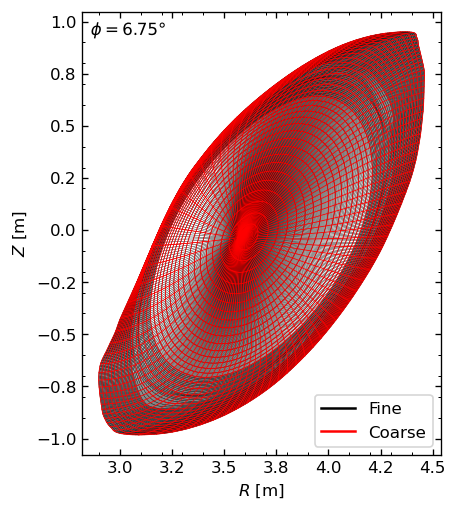

In [7]:
fig, ax = plt.subplots()
grid = Grid("zone0")
grid.plot(ax=ax, linewidth=0.25, n_phi=-10)
grid.plot_coarse(ax=ax, color="red", linewidth=0.5, n_phi=-10)

# Add a legend
proxy = [plt.Line2D([], [], color=color) for color in ["black", "red"]]
ax.legend(proxy, ["Fine", "Coarse"], fontsize=10, loc="lower right");